# June 21 - KvaeNet latent variables

## 1. Analyzing KvaeNet with multiple sampling

In [24]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

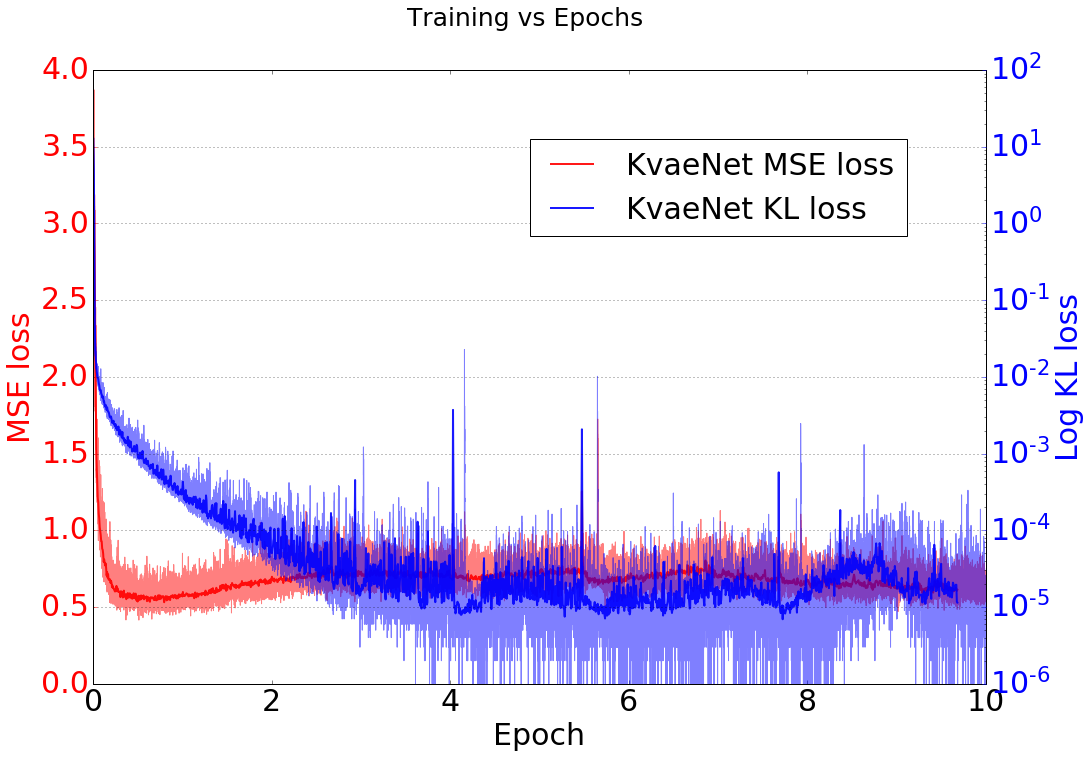

In [52]:
# Using the absolute path
run_id = "20190621_174532"
model_name = "KvaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

## Extracting the events, sampled latent vectors, and the corresponding labels

In [53]:
np_arr_path = dump_dir + "iteration_999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_z = np_arr["z"]
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

In [56]:
print(list(np_arr.keys()))

['events', 'z', 'recons', 'mus', 'logvars', 'labels', 'energies']


## Printing some of the latent vectors and the corresponding label

In [54]:
print(np_z[0])
print(label_dict[np_labels[0]])

[-0.01932326 -0.04183766  0.00126913  0.03105688 -0.00128377  0.00817881
  0.00166596  0.00182638 -0.01511591 -0.07044308 -0.01057764  0.03064525
 -0.01522042  0.00876946  0.03773255  0.0297224  -0.00649846 -0.00615705
 -0.00406184  0.00799109  0.00826389 -0.00638794  0.06486837 -0.00972674
  0.00517534 -0.00868347  0.02466832  0.0193595  -0.02113586  0.00033913
  0.02480196  0.01533285  0.06622149 -0.02483287  0.03658139 -0.06124243
  0.05469923 -0.01413588 -0.03053381  0.04774728 -0.00169578 -0.00250629
  0.05797423  0.02414413  0.0439562   0.06238991  0.03560697  0.04735105
  0.01964826  0.00590108 -0.03118192 -0.04137221  0.02811926 -0.00210621
 -0.03793999  0.01694562 -0.00619859 -0.03696399  0.01324832  0.01725994
 -0.05753416  0.0071491  -0.05151435 -0.01159769]
mu


In [20]:
print(np_z[4])
print(label_dict[np_labels[4]])

[-0.06680616 -0.01962731  0.04507004 -0.01406353  0.02081242 -0.017202
 -0.03385082 -0.007171   -0.03640544  0.07675199  0.03126857 -0.01681455
 -0.0419059  -0.00149158  0.04193457 -0.06875335 -0.01507885  0.06953138
  0.01141235 -0.02282058  0.01527012  0.00017    -0.01261709 -0.00699933
  0.01633597 -0.06523202  0.06629218 -0.03145824 -0.00162132  0.03628254
 -0.02955605  0.00929591 -0.04319216  0.01723824 -0.0314127   0.02834688
 -0.00678675  0.00083584  0.0528251  -0.01875997  0.03015169  0.06556354
 -0.01758398  0.04870857  0.00395144 -0.00564304  0.02758513  0.02055799
 -0.05378643  0.05112061 -0.0276439  -0.04737004 -0.03533117  0.04058788
  0.00301361  0.00405679  0.02155755  0.0219889  -0.01138118 -0.01379844
  0.03441697  0.01820464 -0.02330849 -0.02000236]
gamma


In [22]:
print(np_z[9])
print(label_dict[np_labels[9]])

[ 0.02410129  0.03247773  0.01052641 -0.03895033  0.00813488  0.02810303
  0.02734594 -0.00724209  0.0039028   0.01391152  0.04084612 -0.00275903
 -0.03904556  0.00096514  0.02455886 -0.01413586 -0.03109141  0.02287897
 -0.03329973  0.00914094  0.04641452 -0.00866665 -0.01915178 -0.00477074
 -0.01035675  0.0065137  -0.03318284  0.07848816 -0.07988487  0.04157868
  0.02234458 -0.04384535  0.00414928  0.00673557  0.02451288 -0.02122434
  0.04535164 -0.05081801 -0.06161509 -0.05405566  0.01882625 -0.04820261
 -0.02198453  0.01458493  0.02042539  0.04885606  0.03127255 -0.03745721
 -0.00276529 -0.02718307  0.02365472  0.02785311 -0.06818201 -0.05235262
  0.0038683   0.05310438 -0.05666048  0.05974673  0.03820143 -0.01595026
 -0.03926792  0.01745595 -0.05914925  0.02766706]
e


## Visualizing events

## Iteration 1000

In [50]:
np_arr_path = dump_dir + "iteration_999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

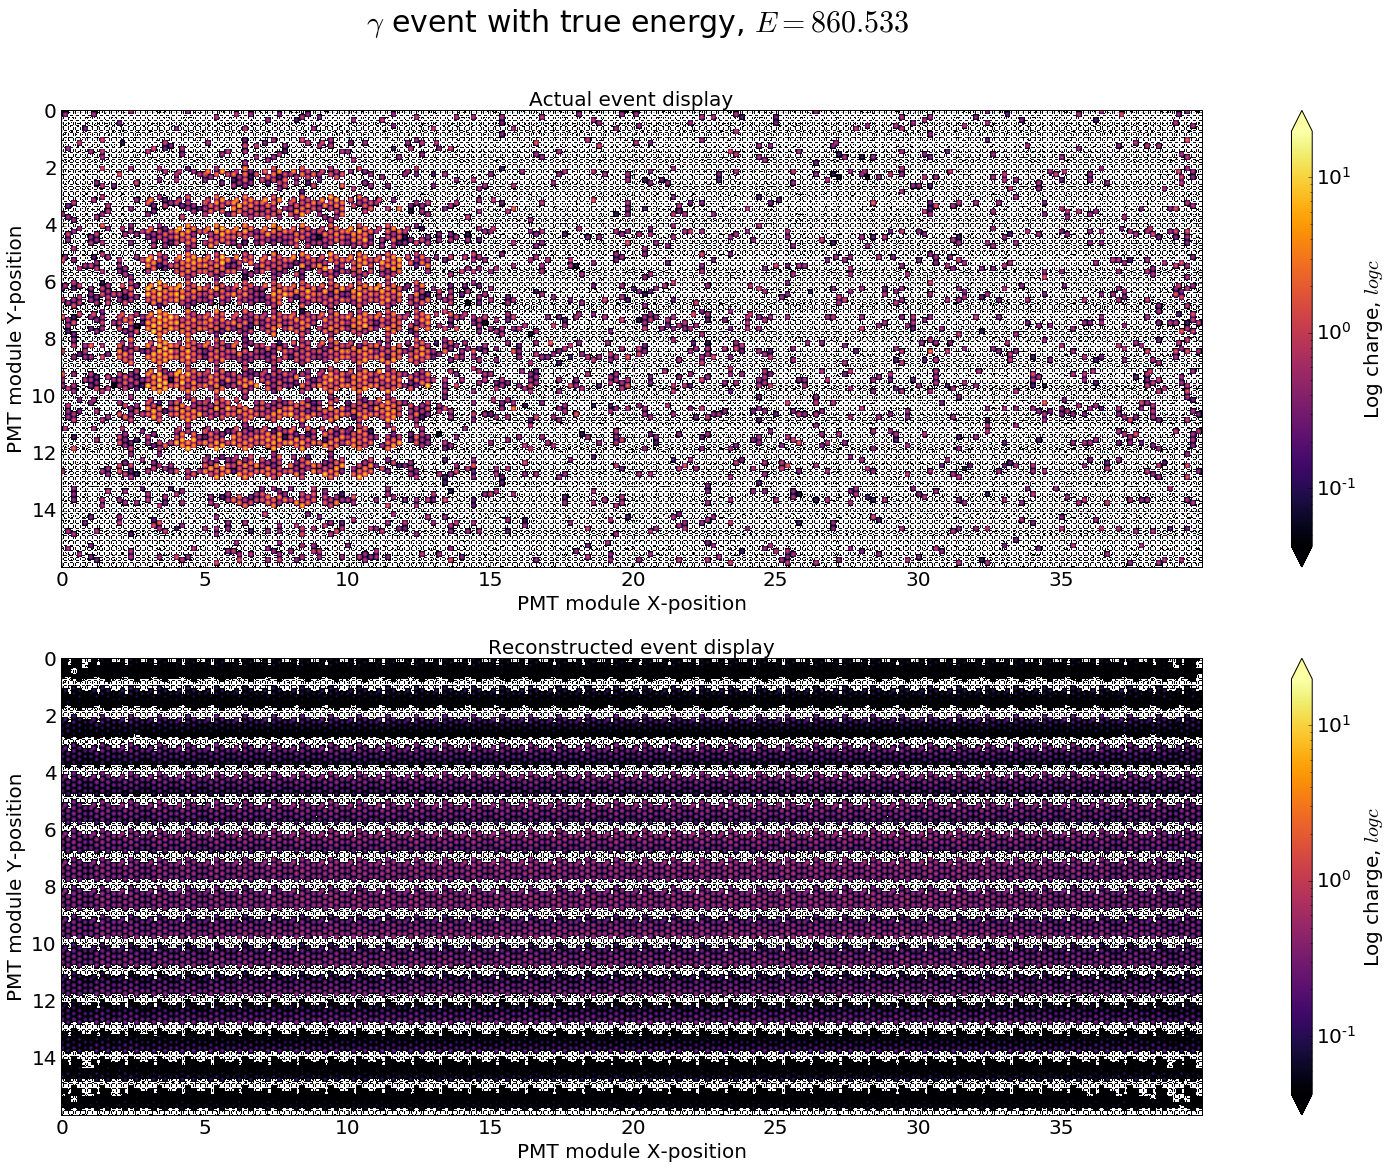

In [51]:
i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## Iteration 5000

In [31]:
np_arr_path = dump_dir + "iteration_4999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

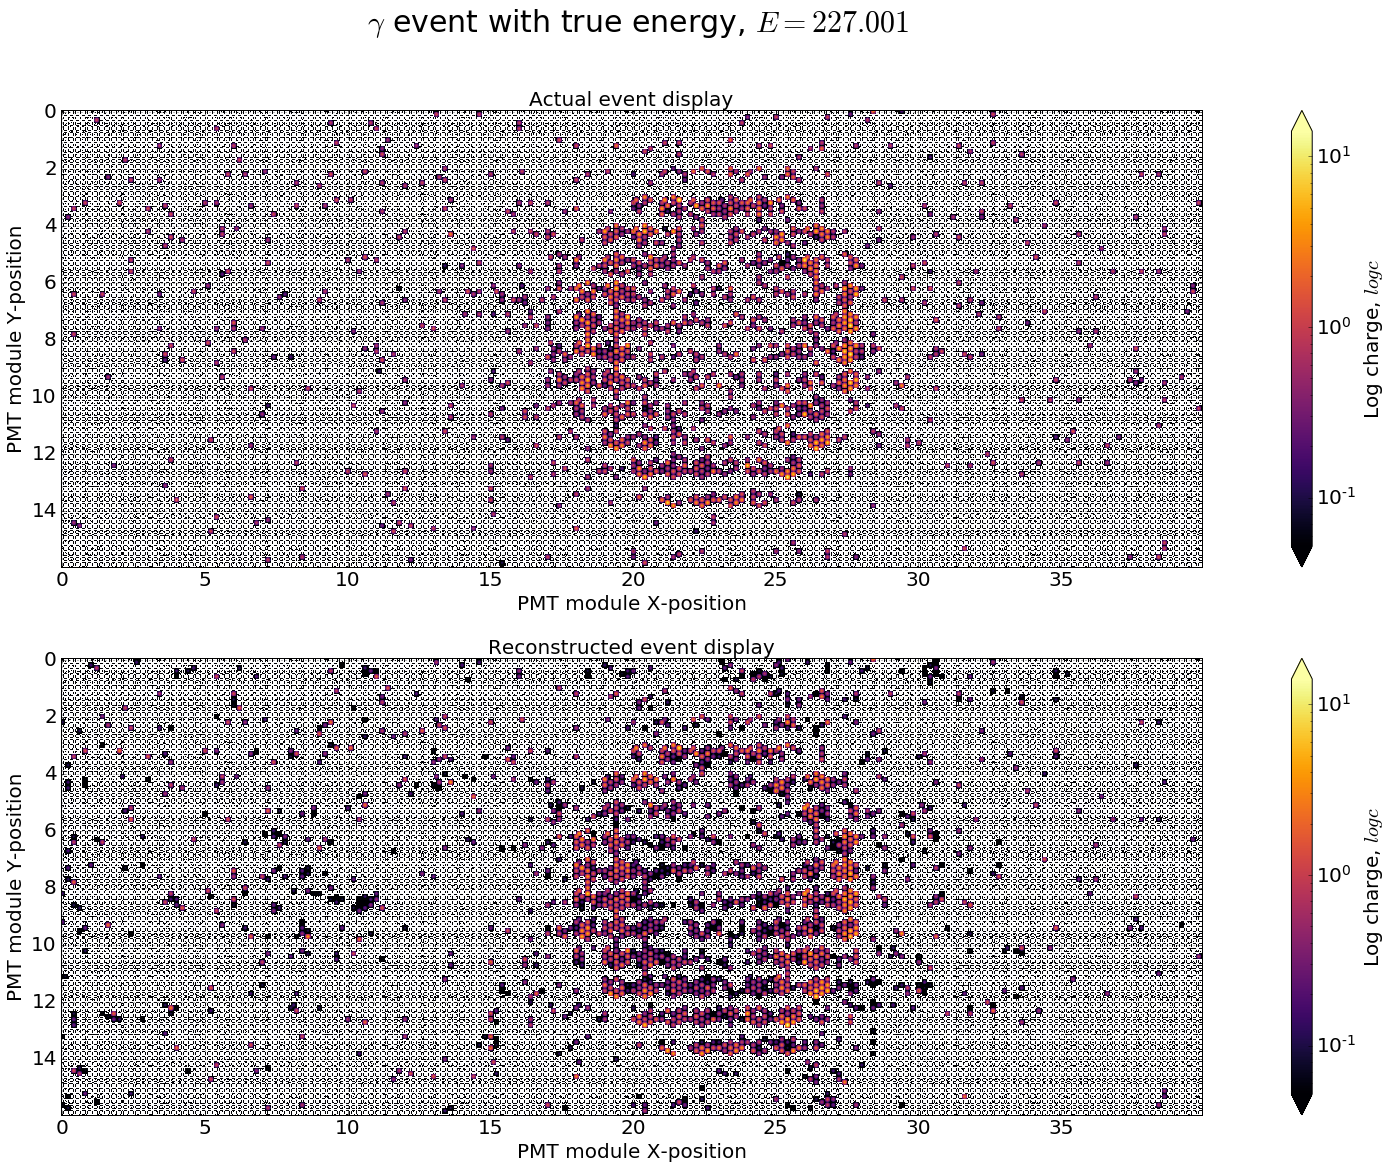

In [35]:
i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## Iteration 10000

In [39]:
np_arr_path = dump_dir + "iteration_9999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

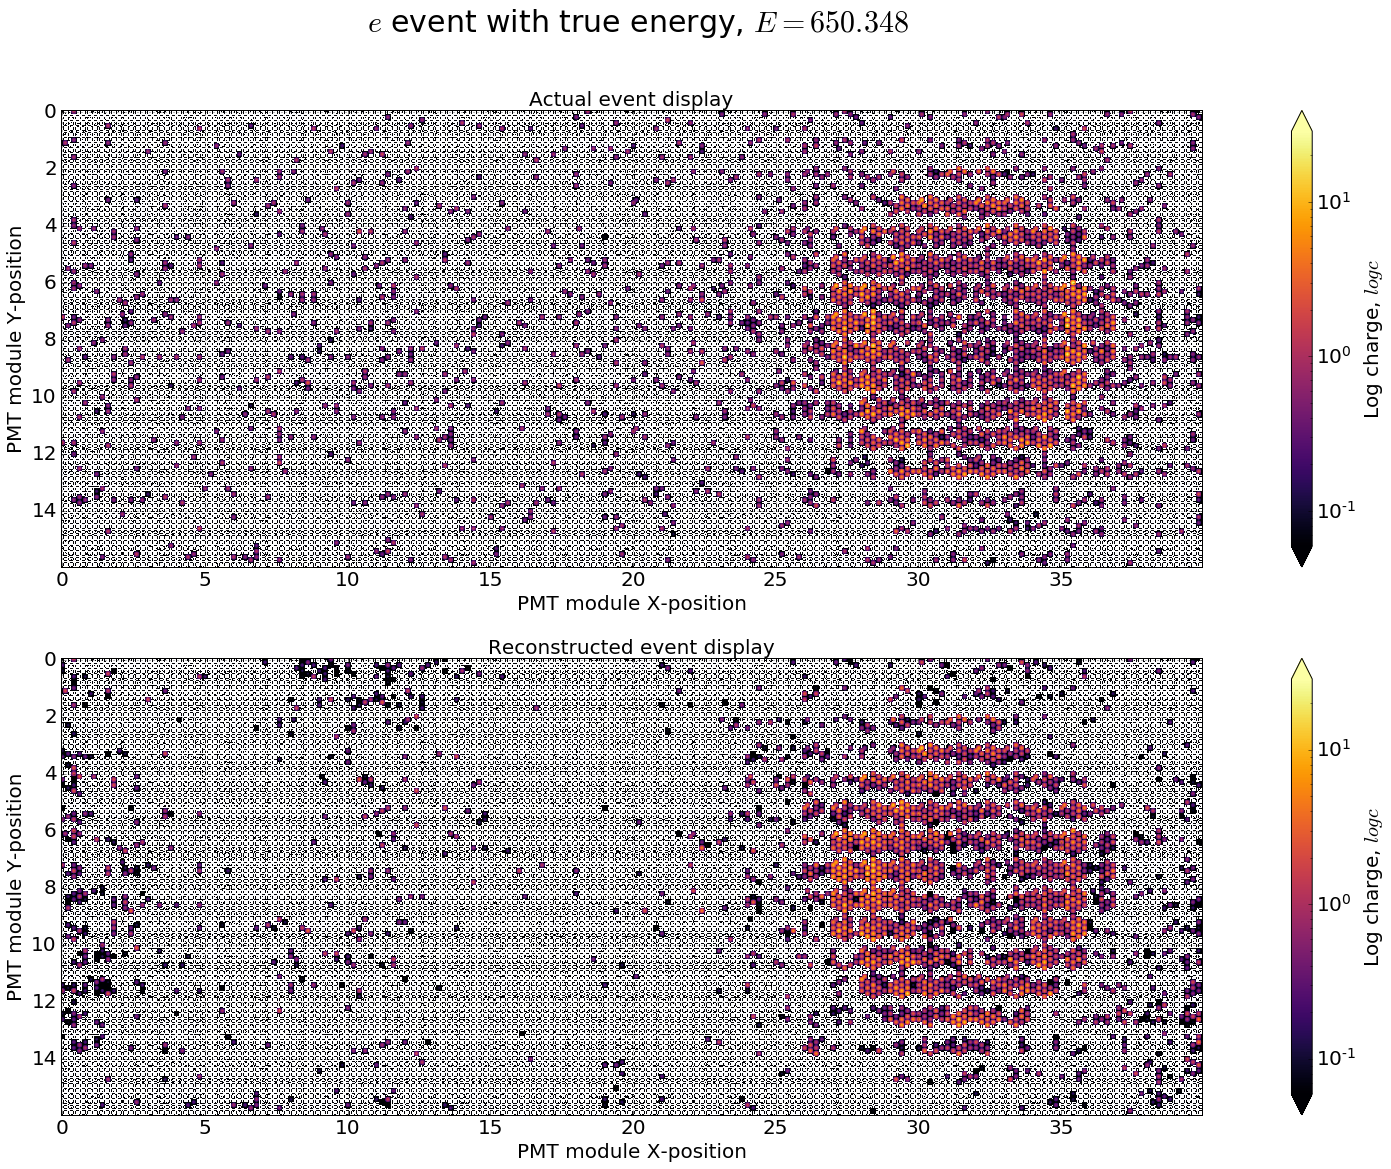

In [38]:
i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## Iteration 15000

In [40]:
np_arr_path = dump_dir + "iteration_14999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

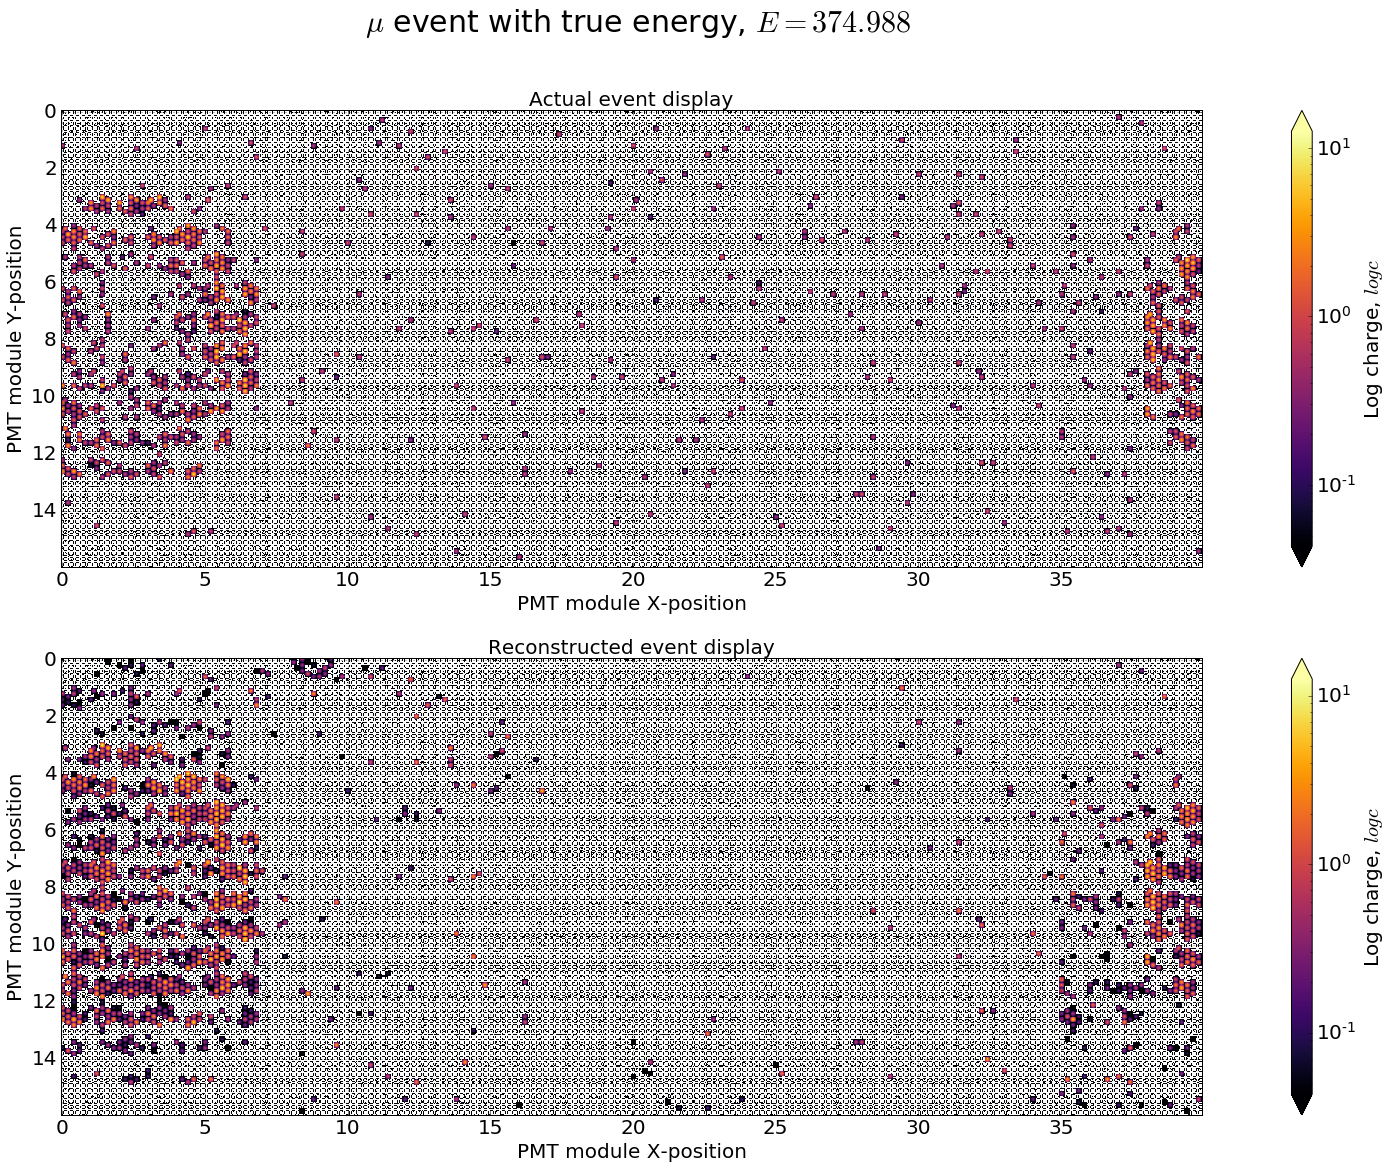

In [42]:
i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## Iteration 20000

In [43]:
np_arr_path = dump_dir + "iteration_19999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

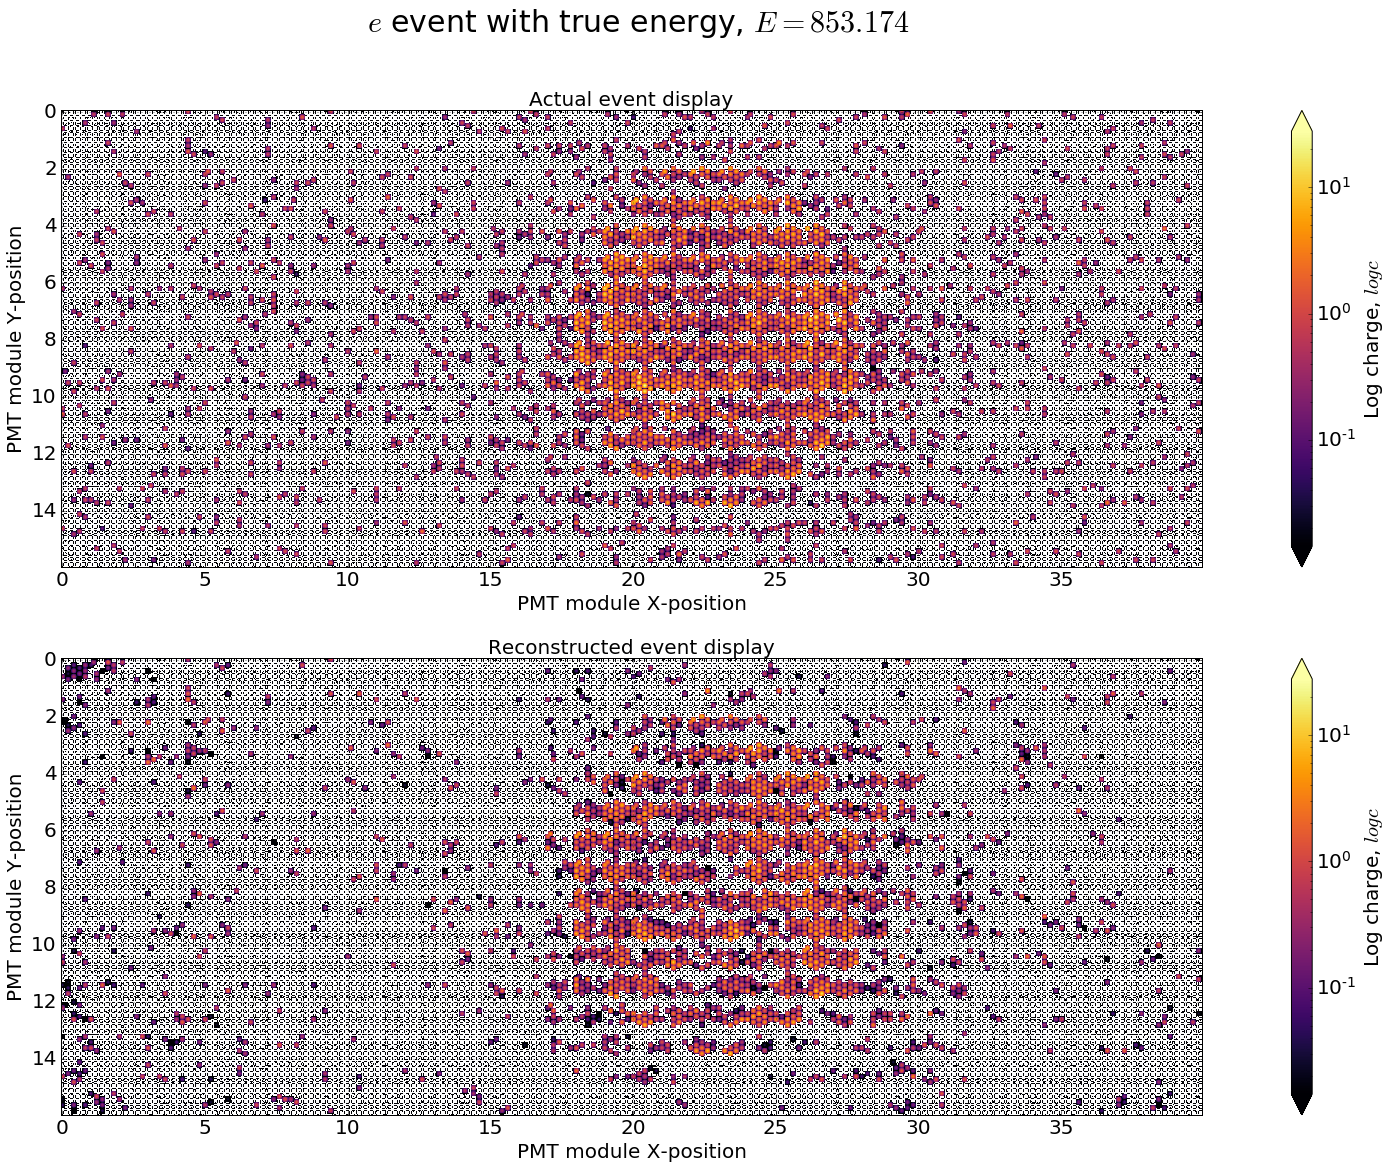

In [44]:
i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## Iteration 25000

In [45]:
np_arr_path = dump_dir + "iteration_24999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

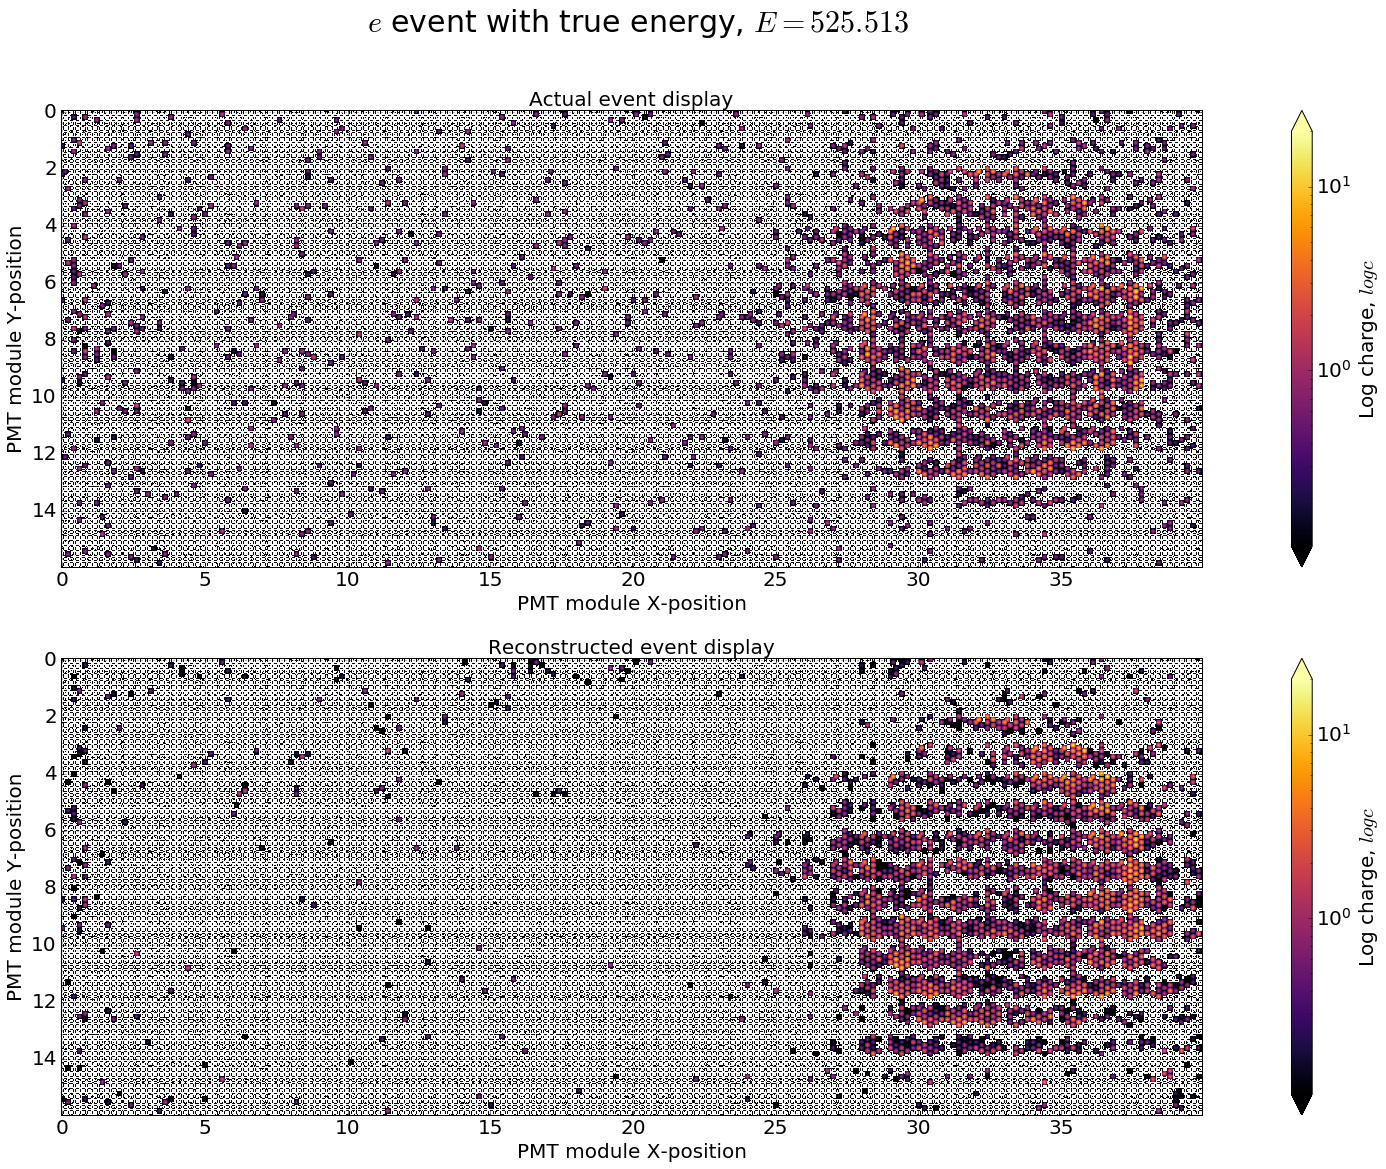

In [46]:
i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## Iteration 30000

In [47]:
np_arr_path = dump_dir + "iteration_29999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

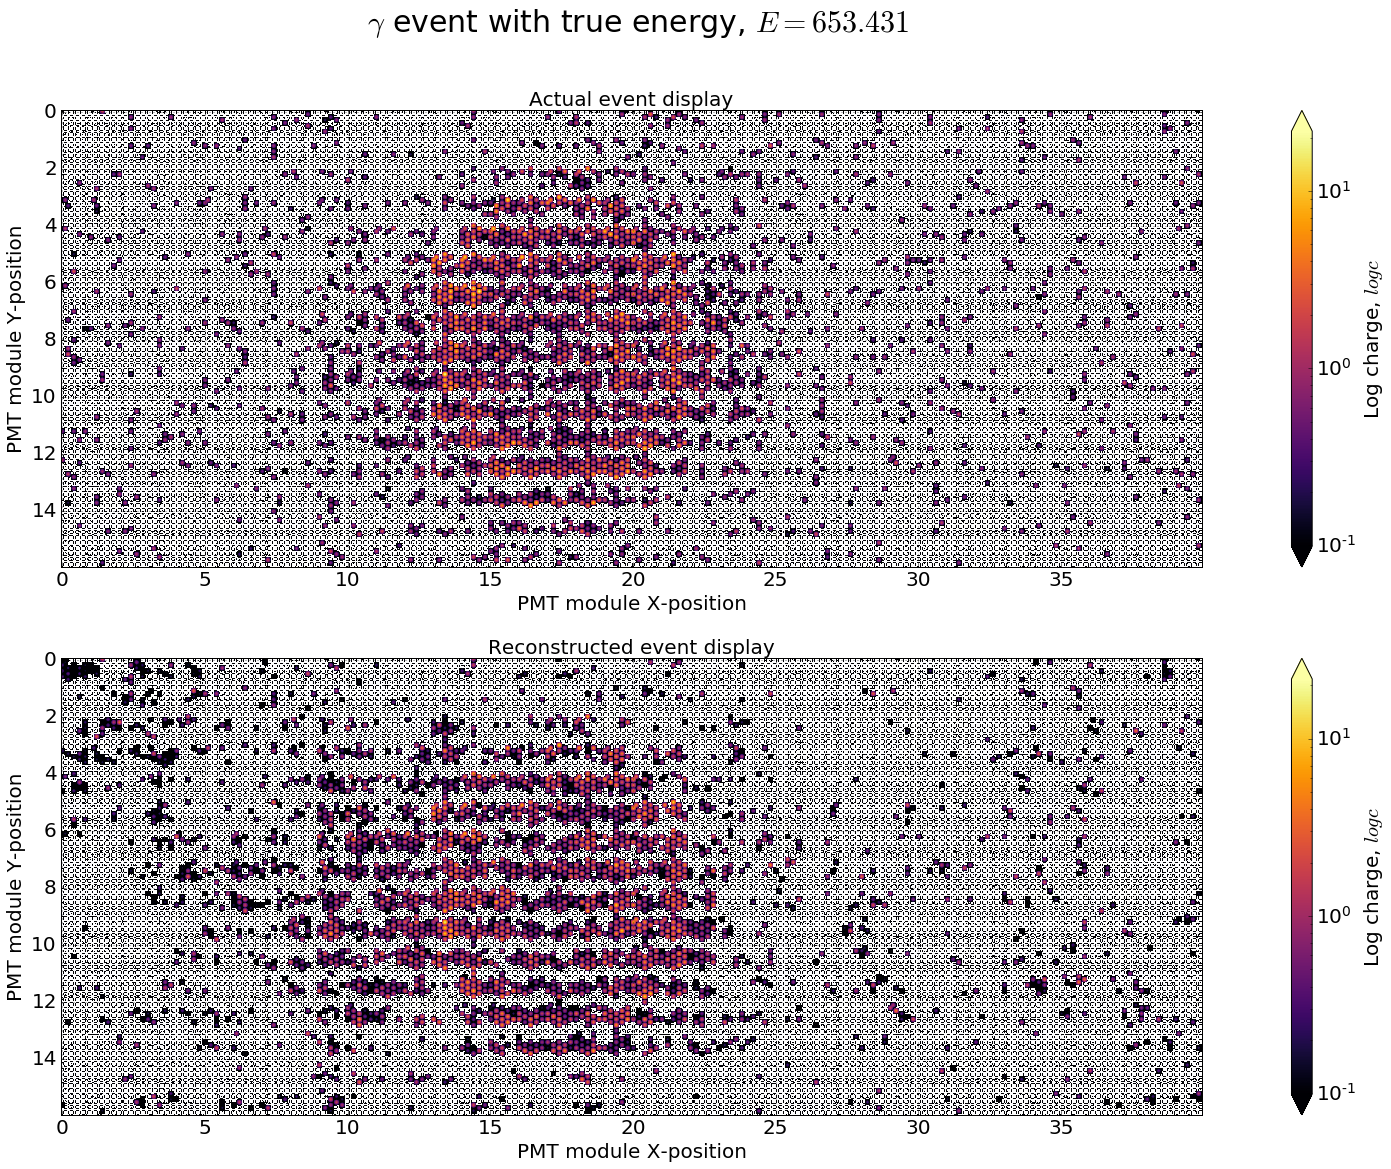

In [48]:
i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)